<a href="https://colab.research.google.com/github/RafaelSperanca/Canadian-Cheese/blob/main/cheese_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# In[1]: Importando Biblioteca

!pip install numpy
!pip install tensorflow
!pip install scikit-learn
!pip install pmdarim
!pip install scipy
!pip install statsmodels
!pip install matplotlib seaborn pandas
!pip install keras-tuner
!pip install scikeras
!pip install pandas openpyxl

ERROR: Could not find a version that satisfies the requirement pmdarim (from versions: none)
ERROR: No matching distribution found for pmdarim
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 4.5 MB/s eta 0:00:00


In [27]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [30]:
# In[2]: Importando arquivos para análise

cheese = pd.read_csv('/content/Canadian-Cheese/cheese_data.csv')

print(cheese.head())

   CheeseId ManufacturerProvCode ManufacturingTypeEn  MoisturePercent  \
0       228                   NB           Farmstead             47.0   
1       242                   NB           Farmstead             47.9   
2       301                   ON          Industrial             54.0   
3       303                   NB           Farmstead             47.0   
4       319                   NB           Farmstead             49.4   

                                          FlavourEn  \
0                                     Sharp, lactic   
1                Sharp, lactic, lightly caramelized   
2                           Mild, tangy, and fruity   
3  Sharp with fruity notes and a hint of wild honey   
4                                      Softer taste   

                                   CharacteristicsEn  Organic  \
0                                           Uncooked        0   
1                                           Uncooked        0   
2  Pressed and cooked cheese, pasta

In [ ]:
# In[3]: Identificando formato das tabelas

cheese.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1042 entries, 0 to 1041
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CheeseId              1042 non-null   int64  
 1   ManufacturerProvCode  1042 non-null   object 
 2   ManufacturingTypeEn   1042 non-null   object 
 3   MoisturePercent       1028 non-null   float64
 4   FlavourEn             801 non-null    object 
 5   CharacteristicsEn     643 non-null    object 
 6   Organic               1042 non-null   int64  
 7   CategoryTypeEn        1019 non-null   object 
 8   MilkTypeEn            1041 non-null   object 
 9   MilkTreatmentTypeEn   977 non-null    object 
 10  RindTypeEn            721 non-null    object 
 11  CheeseName            1042 non-null   object 
 12  FatLevel              1042 non-null   object 
dtypes: float64(1), int64(2), object(10)
memory usage: 106.0+ KB


In [ ]:
# In[4]: Identificando valores missing

print(cheese.isnull().sum())


CheeseId                  0
ManufacturerProvCode      0
ManufacturingTypeEn       0
MoisturePercent          14
FlavourEn               241
CharacteristicsEn       399
Organic                   0
CategoryTypeEn           23
MilkTypeEn                1
MilkTreatmentTypeEn      65
RindTypeEn              321
CheeseName                0
FatLevel                  0
dtype: int64


In [ ]:
# In[5]: Verifica distribuição dos tipos de leite onde está faltando (CharacteristicsEn)

# Transformando em dataframe

char = cheese[cheese['CharacteristicsEn'].isnull()]['ManufacturerProvCode'].value_counts(normalize=True) * 100
charprop = char.round(2)
chardf = char.reset_index()
chardf.columns = ['ManufacturerProvCode', 'proportion']

# Print

print(charprop)

ManufacturerProvCode
QC    69.17
ON    14.54
BC     8.77
NB     2.26
MB     2.01
NS     1.50
AB     1.00
PE     0.25
NL     0.25
SK     0.25
Name: proportion, dtype: float64


/tmp/ipython-input-95-567119169.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=chardf, x='ManufacturerProvCode', y= 'proportion', palette='Set2')


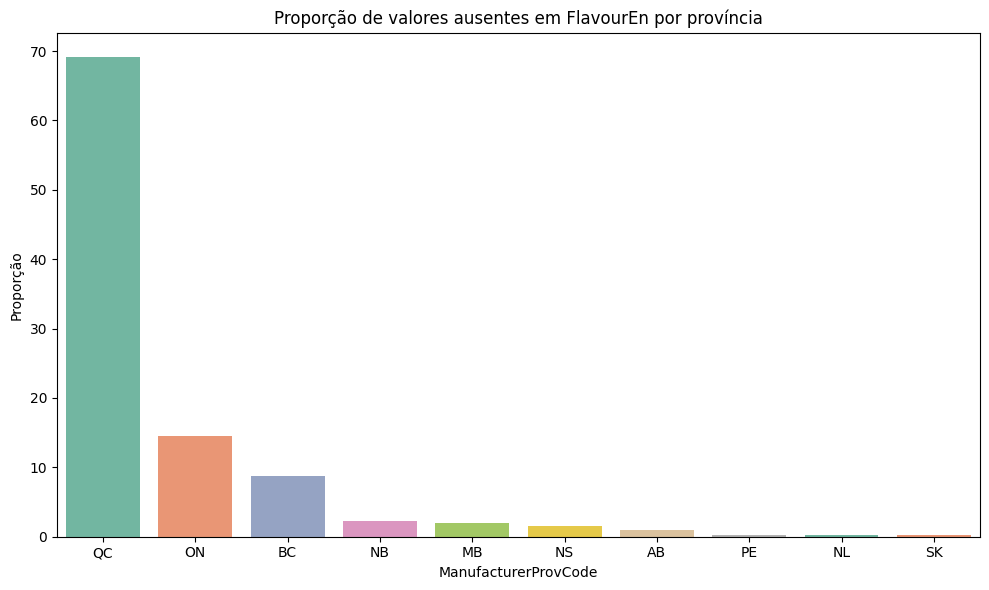

In [ ]:
# Gráfico de CharacteristicsEn vlores ausentes

plt.figure(figsize=(10, 6))
sns.barplot(data=chardf, x='ManufacturerProvCode', y= 'proportion', palette='Set2')
plt.title('Proporção de valores ausentes em FlavourEn por província')
plt.xlabel('ManufacturerProvCode')
plt.ylabel('Proporção')
#plt.ylim(0, 1) # Limita o eixo Y de 0 a 1 (porque é proporção)
plt.tight_layout()
plt.show()

In [ ]:
# In[6]: Verifica distribuição dos tipos de leite onde está faltando (RindTypeEn)

# Transformando em dataframe

rind = cheese[cheese['RindTypeEn'].isnull()]['ManufacturerProvCode'].value_counts(normalize=True) * 100
rindprop = rind.round(2)
rinddf = rind.reset_index()
rinddf.columns = ['ManufacturerProvCode', 'proportion']

# Print

print(rindprop)


ManufacturerProvCode
QC    54.21
ON    23.36
BC    14.02
NB     3.12
AB     1.87
NS     1.87
MB     0.93
PE     0.31
SK     0.31
Name: proportion, dtype: float64


/tmp/ipython-input-89-4227025136.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=rinddf, x='ManufacturerProvCode', y= 'proportion', palette='Set2')


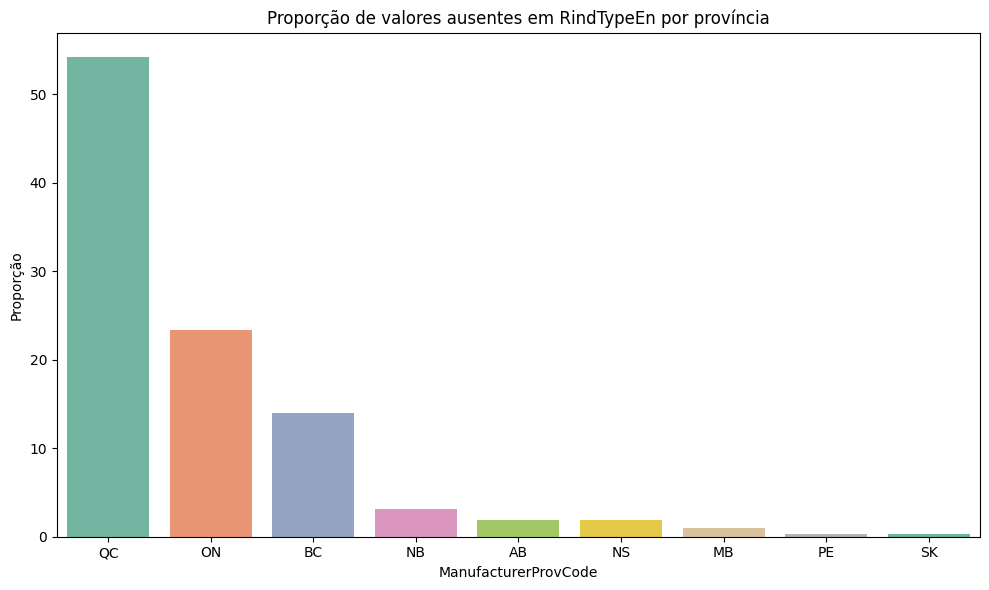

In [ ]:
# Gráfico de RindTypeEn vlores ausentes

plt.figure(figsize=(10, 6))
sns.barplot(data=rinddf, x='ManufacturerProvCode', y= 'proportion', palette='Set2')
plt.title('Proporção de valores ausentes em RindTypeEn por província')
plt.xlabel('ManufacturerProvCode')
plt.ylabel('Proporção')
#plt.ylim(0, 1) # Limita o eixo Y de 0 a 1 (porque é proporção)
plt.tight_layout()
plt.show()

In [ ]:
# In[6]: Verifica distribuição dos tipos de leite onde está faltando (FlavourEn)

fla = cheese[cheese['FlavourEn'].isnull()]['ManufacturerProvCode'].value_counts(normalize=True) * 100
flaprop = fla.round(2)
fladf = flaprop.reset_index()
fladf.columns = ['ManufacturerProvCode', 'proportion']

# Print

print(flaprop)

ManufacturerProvCode
QC    62.24
ON    19.50
BC    11.20
NB     1.66
AB     1.66
MB     1.66
NS     1.24
NL     0.83
Name: proportion, dtype: float64


/tmp/ipython-input-86-1053268192.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=fladf, x='ManufacturerProvCode', y= 'proportion', palette='Set2')


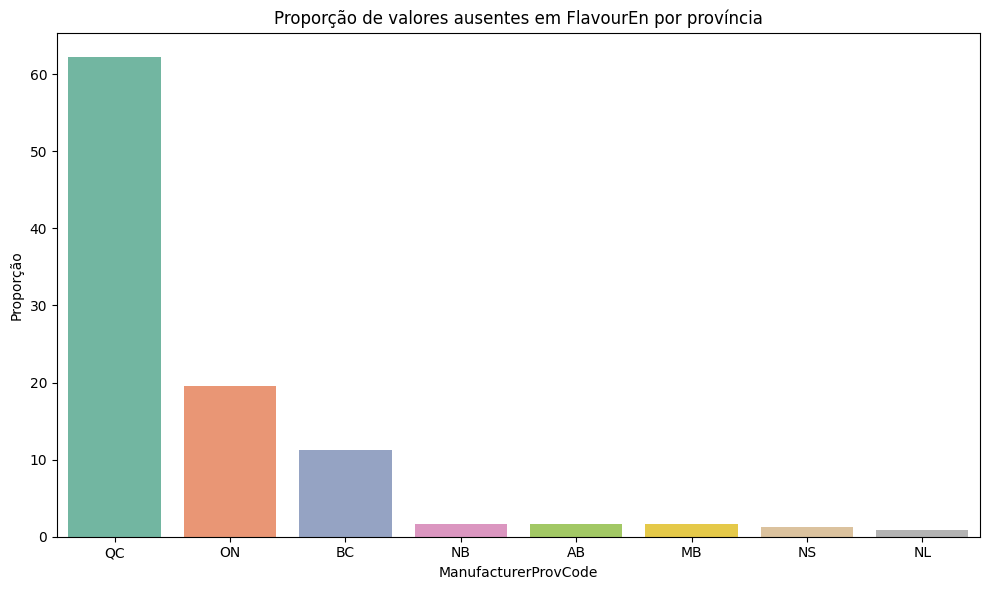

In [ ]:
# Gráfico de FlavourEn vlores ausentes

plt.figure(figsize=(10, 6))
sns.barplot(data=fladf, x='ManufacturerProvCode', y= 'proportion', palette='Set2')
plt.title('Proporção de valores ausentes em FlavourEn por província')
plt.xlabel('ManufacturerProvCode')
plt.ylabel('Proporção')
#plt.ylim(0, 1) # Limita o eixo Y de 0 a 1 (porque é proporção)
plt.tight_layout()
plt.show()

In [ ]:
# In[6]: Tabela cruzada entre Organic e FatLevel (Valor Absoluto)

tabela1 = pd.crosstab(cheese['Organic'], cheese['FatLevel'])
tabela1

FatLevel,higher fat,lower fat
Organic,,
0,312,631
1,46,53


In [ ]:
# In[7]: Tabela cruzada entre Organic e FatLevel (Valor percentual)

tabela = pd.crosstab(cheese['Organic'], cheese['FatLevel'], normalize='all')
tabela = tabela.round(4) * 100
tabela

FatLevel,higher fat,lower fat
Organic,,
0,29.94,60.56
1,4.41,5.09


In [ ]:
media = cheese.groupby('FatLevel')['MoisturePercent'].mean().reset_index()
media = media.round(2)
media

,FatLevel,MoisturePercent
0,higher fat,40.54
1,lower fat,50.53


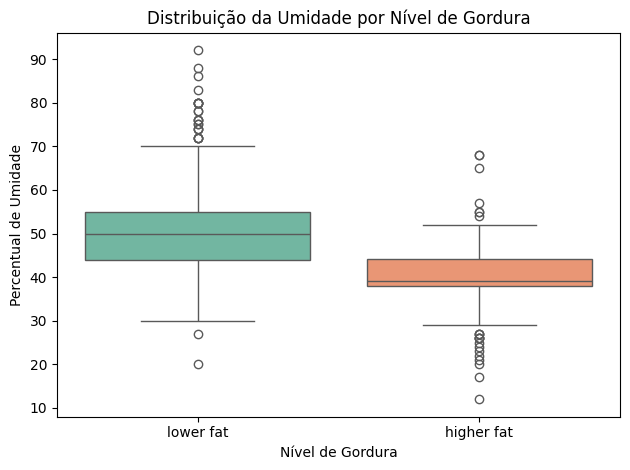

In [ ]:
sns.boxplot(data=cheese, x='FatLevel', y='MoisturePercent',hue='FatLevel', palette='Set2')
plt.title('Distribuição da Umidade por Nível de Gordura')
plt.xlabel('Nível de Gordura')
plt.ylabel('Percentual de Umidade')
plt.tight_layout()
plt.show()

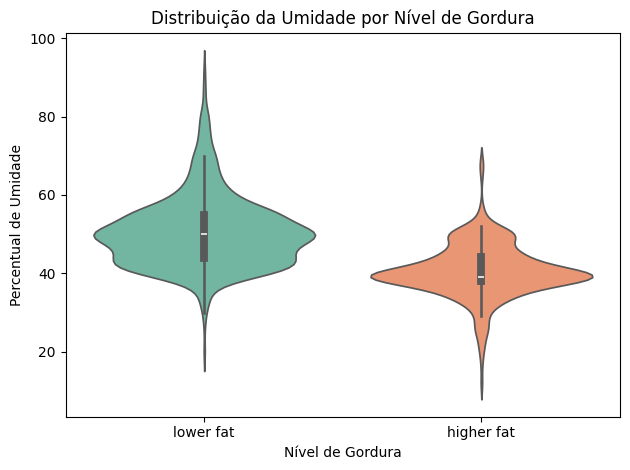

In [ ]:
sns.violinplot(data=cheese, x='FatLevel', y='MoisturePercent', hue='FatLevel', palette='Set2')
plt.title('Distribuição da Umidade por Nível de Gordura')
plt.xlabel('Nível de Gordura')
plt.ylabel('Percentual de Umidade')
plt.tight_layout()
plt.show()

# Pergunta:

### (I) Para cada província, qual o tipo de queijo mais produzido?

### (II) Para cada queijo, qual província é a principal produtora?



In [ ]:
top5_provincias  = cheese['ManufacturerProvCode'].value_counts().head(5)
top5_provincias

,count
ManufacturerProvCode,
QC,796
ON,115
BC,65
NB,27
AB,13


In [ ]:
top5_provincias  = cheese['ManufacturerProvCode'].value_counts().head(5).index
top5_provincias

Index(['QC', 'ON', 'BC', 'NB', 'AB'], dtype='object', name='ManufacturerProvCode')

In [ ]:
cheesefreq = cheese[cheese['ManufacturerProvCode'].isin(top5_provincias)]
cheesefreq

,CheeseId,ManufacturerProvCode,ManufacturingTypeEn,MoisturePercent,FlavourEn,CharacteristicsEn,Organic,CategoryTypeEn,MilkTypeEn,MilkTreatmentTypeEn,RindTypeEn,CheeseName,FatLevel
0,228,NB,Farmstead,47.0,"Sharp, lactic",Uncooked,0,Firm Cheese,Ewe,Raw Milk,Washed Rind,Sieur de Duplessis (Le),lower fat
1,242,NB,Farmstead,47.9,"Sharp, lactic, lightly caramelized",Uncooked,0,Semi-soft Cheese,Cow,Raw Milk,Washed Rind,Tomme Le Champ Doré,lower fat
2,301,ON,Industrial,54.0,"Mild, tangy, and fruity","Pressed and cooked cheese, pasta filata, inter...",0,Firm Cheese,Cow,Pasteurized,NaN,Provolone Sette Fette (Tre-Stelle),lower fat
3,303,NB,Farmstead,47.0,Sharp with fruity notes and a hint of wild honey,NaN,0,Veined Cheeses,Cow,Raw Milk,NaN,Geai Bleu (Le),lower fat
4,319,NB,Farmstead,49.4,Softer taste,NaN,1,Semi-soft Cheese,Cow,Raw Milk,Washed Rind,Gamin (Le),lower fat
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1034,2384,NB,Farmstead,50.0,Maple Hazelnut,Fresh goat ladle-molded,0,Soft Cheese,Goat,Pasteurized,NaN,Petit frais aux noix et sirop d'érable,lower fat
1035,2385,NB,Farmstead,50.0,pepper and garlic,Small aperitif cheese balls,0,Semi-soft Cheese,Goat,Pasteurized,NaN,Petits caprice,lower fat
1036,2386,NB,Farmstead,50.0,Unsweetened cranberry,Fresh goat ladle-molded,0,Fresh Cheese,Goat,Pasteurized,NaN,Petit frais aux canneberges,lower fat
1038,2388,AB,Industrial,46.0,Mild and Deep Flavor,Low in Sodium and Fat,0,Fresh Cheese,Cow,Pasteurized,NaN,FRESK-O,lower fat


In [ ]:
# In[8]: Tabela cruzada entre Organic e FatLevel (Valor percentual)

tabela1 = pd.crosstab(
                      cheesefreq['CategoryTypeEn'],
                      cheesefreq['ManufacturerProvCode'])
tabela1

ManufacturerProvCode,AB,BC,NB,ON,QC
CategoryTypeEn,,,,,
Firm Cheese,5,28,3,27,274
Fresh Cheese,3,2,6,23,85
Hard Cheese,0,8,0,13,10
Semi-soft Cheese,2,7,7,28,176
Soft Cheese,0,15,10,16,224
Veined Cheeses,0,5,1,2,16


In [ ]:
# Por coluna

tabela1 = pd.crosstab(
                      cheesefreq['CategoryTypeEn'],
                      cheesefreq['ManufacturerProvCode'],
                      normalize='columns')
tabela2 = tabela1.round(4) * 100
tabela2

ManufacturerProvCode,AB,BC,NB,ON,QC
CategoryTypeEn,,,,,
Firm Cheese,50.0,43.08,11.11,24.77,34.90
Fresh Cheese,30.0,3.08,22.22,21.10,10.83
Hard Cheese,0.0,12.31,0.00,11.93,1.27
Semi-soft Cheese,20.0,10.77,25.93,25.69,22.42
Soft Cheese,0.0,23.08,37.04,14.68,28.54
Veined Cheeses,0.0,7.69,3.70,1.83,2.04


In [ ]:
# Por linha

tabela1 = pd.crosstab(
                      cheesefreq['CategoryTypeEn'],
                      cheesefreq['ManufacturerProvCode'],
                      normalize='index')
tabela2 = tabela1.round(4) * 100
tabela2

ManufacturerProvCode,AB,BC,NB,ON,QC
CategoryTypeEn,,,,,
Firm Cheese,1.48,8.31,0.89,8.01,81.31
Fresh Cheese,2.52,1.68,5.04,19.33,71.43
Hard Cheese,0.00,25.81,0.00,41.94,32.26
Semi-soft Cheese,0.91,3.18,3.18,12.73,80.00
Soft Cheese,0.00,5.66,3.77,6.04,84.53
Veined Cheeses,0.00,20.83,4.17,8.33,66.67


In [ ]:
Milk = cheese['MilkTypeEn'].value_counts()
Milk

,count
MilkTypeEn,
Cow,743
Goat,214
Ewe,62
Cow and Goat,13
Ewe and Cow,4
Ewe and Goat,2
Buffalo Cow,2
"Cow, Goat and Ewe",1


In [ ]:
Milk2 = cheese['MilkTypeEn'].value_counts().head(2).index
Milk2

Index(['Cow', 'Goat'], dtype='object', name='MilkTypeEn')

In [ ]:
Milkfreq = cheese[cheese['MilkTypeEn'].isin(Milk2)]
Milkfreq

,CheeseId,ManufacturerProvCode,ManufacturingTypeEn,MoisturePercent,FlavourEn,CharacteristicsEn,Organic,CategoryTypeEn,MilkTypeEn,MilkTreatmentTypeEn,RindTypeEn,CheeseName,FatLevel
1,242,NB,Farmstead,47.9,"Sharp, lactic, lightly caramelized",Uncooked,0,Semi-soft Cheese,Cow,Raw Milk,Washed Rind,Tomme Le Champ Doré,lower fat
2,301,ON,Industrial,54.0,"Mild, tangy, and fruity","Pressed and cooked cheese, pasta filata, inter...",0,Firm Cheese,Cow,Pasteurized,NaN,Provolone Sette Fette (Tre-Stelle),lower fat
3,303,NB,Farmstead,47.0,Sharp with fruity notes and a hint of wild honey,NaN,0,Veined Cheeses,Cow,Raw Milk,NaN,Geai Bleu (Le),lower fat
4,319,NB,Farmstead,49.4,Softer taste,NaN,1,Semi-soft Cheese,Cow,Raw Milk,Washed Rind,Gamin (Le),lower fat
5,350,NB,Industrial,48.0,NaN,Classic fresh cooking cheeses,0,Fresh Cheese,Cow,Pasteurized,NaN,Paneer (Northumberland Co-operative),lower fat
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1035,2385,NB,Farmstead,50.0,pepper and garlic,Small aperitif cheese balls,0,Semi-soft Cheese,Goat,Pasteurized,NaN,Petits caprice,lower fat
1036,2386,NB,Farmstead,50.0,Unsweetened cranberry,Fresh goat ladle-molded,0,Fresh Cheese,Goat,Pasteurized,NaN,Petit frais aux canneberges,lower fat
1037,2387,NS,Farmstead,37.0,"Dill, Caraway, Chili Pepper, Cumin, Sage, Chiv...",Fresh curds through a variety of added Organic...,1,Hard Cheese,Cow,Pasteurized,NaN,Knoydart,higher fat
1038,2388,AB,Industrial,46.0,Mild and Deep Flavor,Low in Sodium and Fat,0,Fresh Cheese,Cow,Pasteurized,NaN,FRESK-O,lower fat


In [ ]:
# Diferença entre leite vaca e ovelha

freqMilk  = pd.crosstab(
                        Milkfreq['MilkTypeEn'],
                        Milkfreq['FatLevel'])
freqMilk

FatLevel,higher fat,lower fat
MilkTypeEn,,
Cow,297,446
Goat,29,185


In [ ]:
freqleit_prop = pd.crosstab(
                            Milkfreq['MilkTypeEn'],
                            Milkfreq['FatLevel'],
                            normalize='all') * 100
freqleitprop

FatLevel,higher fat,lower fat
MilkTypeEn,,
Cow,31.03,46.60
Goat,3.03,19.33


In [ ]:
# Resetando o índice para transformar em Dataframe

tabela_reset = freqleitprop.reset_index()
tabela_reset.columns = ['MilkTypeEn', 'higher fat', 'lower fat']

In [ ]:
# Renomenado as colunas

tabela_reset.columns.name = None # remove o nome do índice
tabela_reset.columns = ['MilkTypeEn', 'higher fat', 'lower fat']

In [ ]:
tabela_melt = pd.melt(
    tabela_reset,
    id_vars='MilkTypeEn',
    value_vars=['lower fat', 'higher fat'],
    var_name='Fat Level',
    value_name='Percentual'
)

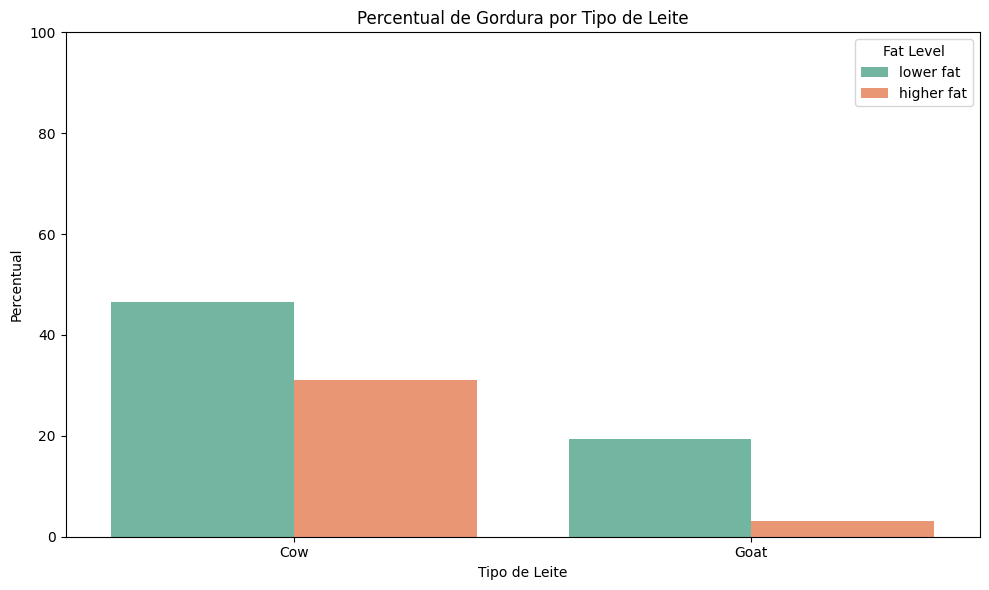

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(data=tabela_melt, x='MilkTypeEn', y= 'Percentual', hue = 'Fat Level', palette = 'Set2')
plt.title('Percentual de Gordura por Tipo de Leite')
plt.xlabel('Tipo de Leite')
plt.ylabel('Percentual')
plt.ylim(0, 100)
plt.tight_layout()
plt.show()

In [ ]:
ManufacturingTypeEn = cheese['ManufacturingTypeEn'].value_counts()
ManufacturingTypeEn

,count
ManufacturingTypeEn,
Industrial,455
Artisan,367
Farmstead,220


In [ ]:
ManufacturingTypeEn_prop = (cheese['ManufacturingTypeEn'].value_counts(normalize=True) * 100).round(2)
ManufacturingTypeEn_prop

,proportion
ManufacturingTypeEn,
Industrial,43.67
Artisan,35.22
Farmstead,21.11


In [ ]:
Manuf = cheese.groupby('ManufacturingTypeEn')['MoisturePercent'].mean().reset_index()
Manuf = Manuf.round(2)
Manuf

,ManufacturingTypeEn,MoisturePercent
0,Artisan,46.43
1,Farmstead,47.17
2,Industrial,47.54


In [ ]:
tabela_org = pd.crosstab(cheese['Organic'], cheese['ManufacturingTypeEn'])
tabela_org

ManufacturingTypeEn,Artisan,Farmstead,Industrial
Organic,,,
0,336,164,443
1,31,56,12


In [ ]:
cheese_flav = cheese.dropna(subset=['FlavourEn'])

In [ ]:
FlavourEn = cheese_flav.groupby('FatLevel')['FlavourEn'].nunique()
FlavourEn = FlavourEn.round(2)
FlavourEn

,FlavourEn
FatLevel,
higher fat,224
lower fat,424


In [ ]:
# Tipo de casca e tipo de queijo

tabela_org = pd.crosstab(cheese['CategoryTypeEn'], cheese['RindTypeEn'])
tabela_org

RindTypeEn,Bloomy Rind,Brushed Rind,No Rind,Washed Rind
CategoryTypeEn,,,,
Firm Cheese,3,2,201,27
Fresh Cheese,4,0,86,0
Hard Cheese,0,0,12,1
Semi-soft Cheese,6,3,59,86
Soft Cheese,148,0,40,32
Veined Cheeses,2,0,1,0


In [ ]:
# Tipo de casca e umidade

tabela_org = cheese.groupby('RindTypeEn')['MoisturePercent'].mean().reset_index()
tabela_org

,RindTypeEn,MoisturePercent
0,Bloomy Rind,51.298160
1,Brushed Rind,43.200000
2,No Rind,47.647750
3,Washed Rind,45.544898


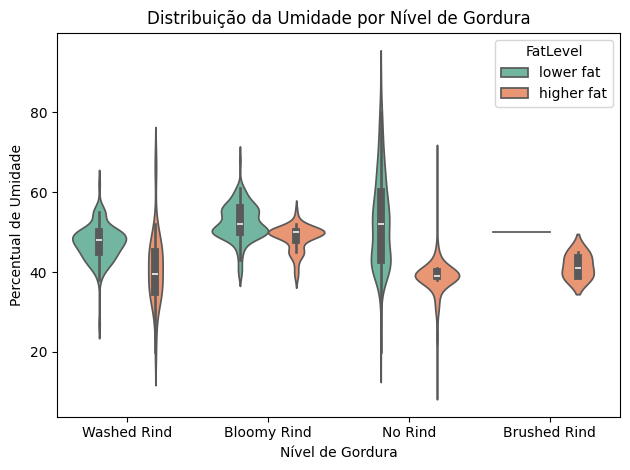

In [ ]:
sns.violinplot(data=cheese, x='RindTypeEn', y='MoisturePercent', hue='FatLevel', palette='Set2')
plt.title('Distribuição da Umidade por Nível de Gordura')
plt.xlabel('Nível de Gordura')
plt.ylabel('Percentual de Umidade')
plt.tight_layout()
plt.show()

In [ ]:
heattabela = cheese.pivot_table(
                                index='FatLevel',
                                columns='CategoryTypeEn',
                                values='Organic',
                                aggfunc='mean'
)

In [ ]:
heattabela

CategoryTypeEn,Firm Cheese,Fresh Cheese,Hard Cheese,Semi-soft Cheese,Soft Cheese,Veined Cheeses
FatLevel,,,,,,
higher fat,0.137056,0.000000,0.333333,0.129630,0.063492,0.200000
lower fat,0.078947,0.054545,0.214286,0.075145,0.068627,0.266667


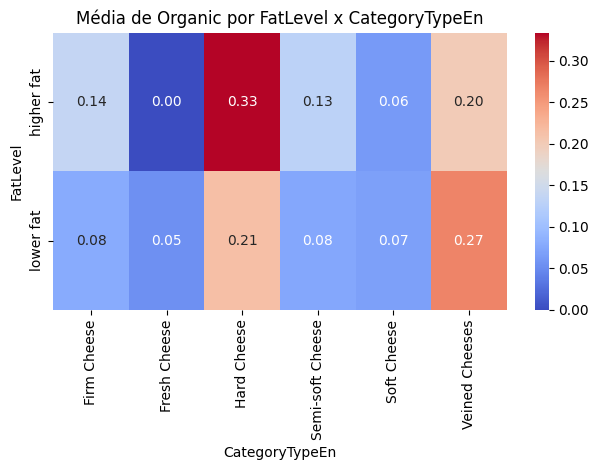

In [ ]:
sns.heatmap(heattabela, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Média de Organic por FatLevel x CategoryTypeEn')
plt.xlabel('CategoryTypeEn')
plt.ylabel('FatLevel')
plt.tight_layout()
plt.show()